# **Turismo** ⛅
## *Practica 7*

.

Swietenia Naomi Medina Gasca

Martes 24 de Junio de 2025

In [1]:
#importar las bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracción

In [2]:
#cargar los archivos de Reseñas
resena=pd.read_csv('VER_resenas.csv')

#mostrar los primeros registros
resena.head(2)


,resena_id,destino_id,visitante_id,calificacion,comentario,fecha_resena
0,1,19,2569,2,Perfecto para familias,2024-12-29
1,2,12,3545,1,Asequible y hermoso,2023-02-23


In [3]:
#cargar los archivos de Visitantes
visitantes=pd.read_csv('VER_visitantes.csv')

#mostrar los primeros registros
visitantes.head(2)


,visitante_id,nombre,edad,pais_origen,destino_id,fecha_visita,duracion_dias
0,1001,Turista_1765,32,Japón,16,2023-05-23,20
1,1002,Turista_204,58,Alemania,14,2024-09-18,9


In [4]:
#cargar los archivos de destinos turisticos
destinos=pd.read_csv('VER_destinos_turisticos.csv')

#mostrar los primeros registros
destinos.head(2)


,nombre,pais,tipo,destino_id,costo_promedio_usd,popularidad
0,Playa del Carmen,México,Playa,1,405.81,3
1,Machu Picchu,Perú,Cultural,2,953.18,2


# Transformar

In [5]:
#eliminar campos nulos
resena=resena.dropna()
visitantes=visitantes.dropna()
destinos=destinos.dropna()

#dropduplicate para eliminar filas duplicadas

In [6]:
# Unir reseñas y destinos
resenas_destinos = pd.merge(resena, destinos, on='destino_id')

# Unir el resultado anterior con visitantes
turismo_df = pd.merge(resenas_destinos, visitantes, on='visitante_id')

# Mostrar
display(turismo_df.head())

,resena_id,destino_id_x,visitante_id,calificacion,comentario,fecha_resena,nombre_x,pais,tipo,costo_promedio_usd,popularidad,nombre_y,edad,pais_origen,destino_id_y,fecha_visita,duracion_dias
0,1,19,2569,2,Perfecto para familias,2024-12-29,Berlín,Alemania,Ciudad,460.35,2,Turista_850,39,Japón,5,2023-07-05,4
1,2,12,3545,1,Asequible y hermoso,2023-02-23,Santorini,Grecia,Playa,971.41,5,Turista_2505,37,Canadá,10,2023-10-28,30
2,3,10,1983,1,No volvería,2024-12-20,Río de Janeiro,Brasil,Playa,722.67,5,Turista_1619,55,Brasil,1,2024-08-26,12
3,4,13,2435,4,Demasiado turístico,2024-08-14,París,Francia,Ciudad,840.82,1,Turista_2263,19,Canadá,17,2023-12-19,20
4,5,20,1897,2,Increíble experiencia,2023-05-31,Capadocia,Turquía,Aventura,326.67,1,Turista_2887,73,Brasil,13,2024-07-27,16


# Cargar Datos

In [7]:
turismo_df.to_csv('turismo_df.csv')
print("datos exportados correctamente")

datos exportados correctamente


# Visualización de datos

**Gráfico de Barras: Costo vs Calificación promedio por tipo de destino Gráfico de Barras**

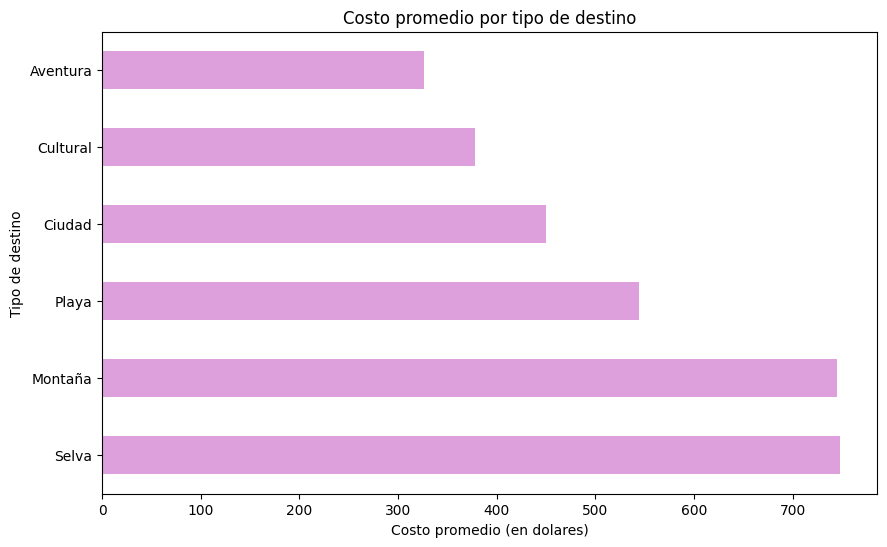

In [10]:
# Calcular el costo promedio :/
promedio_x_tipo = turismo_df.groupby('tipo')['costo_promedio_usd'].mean().sort_values(ascending=False)

# Crear la grafica de barras
plt.figure(figsize=(10, 6))
promedio_x_tipo.plot(kind='barh', color='plum')
plt.title('Costo promedio por tipo de destino')
plt.xlabel('Costo promedio (en dolares)')
plt.ylabel('Tipo de destino')
plt.show()

**Gráfico de Barras: Top 5 destinos más populares**

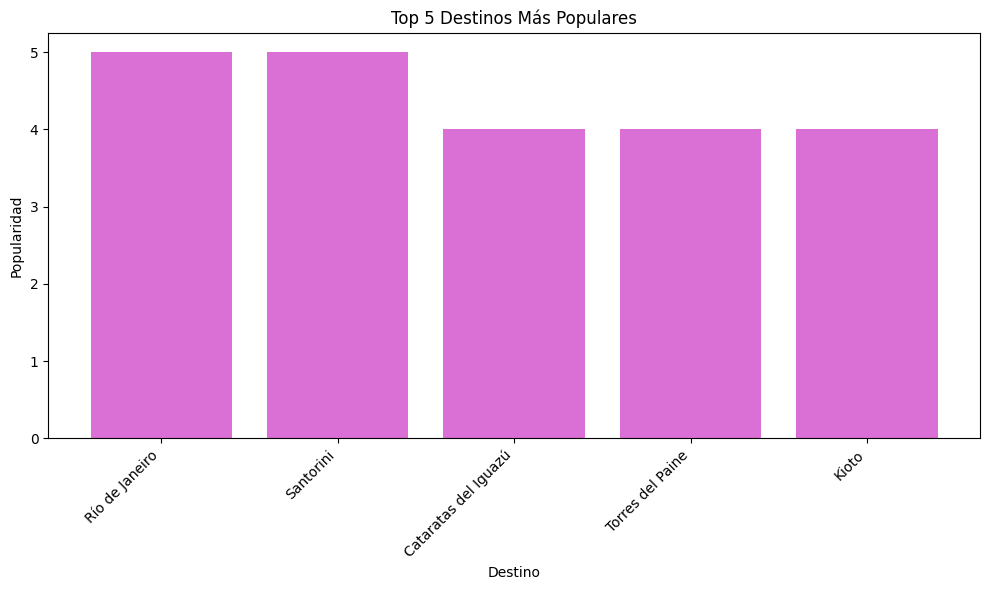

In [11]:
# Calcular popularidad
destinos_pop = destinos.sort_values(by='popularidad', ascending=False).head()

# Crear grafica
plt.figure(figsize=(10, 6))
plt.bar(destinos_pop['nombre'], destinos_pop['popularidad'], color='orchid')
plt.title('Top 5 Destinos Más Populares')
plt.xlabel('Destino')
plt.ylabel('Popularidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Gráfico de Dispersión: Costo vs duración de la visita**

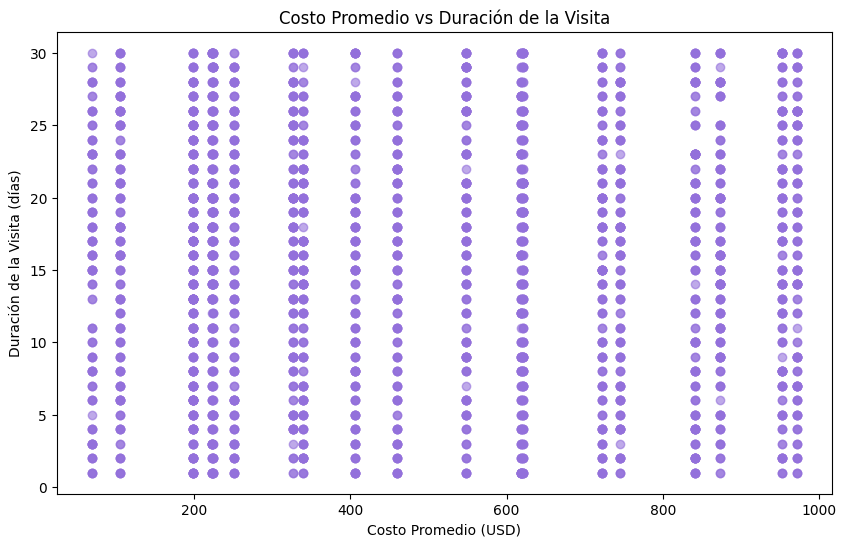

In [18]:
# Crear un grafico de dispersion
plt.figure(figsize=(10, 6))
plt.scatter(data=turismo_df, x='costo_promedio_usd', y='duracion_dias', alpha=0.6, color='mediumpurple')
plt.title('Costo Promedio vs Duración de la Visita')
plt.xlabel('Costo Promedio (USD)')
plt.ylabel('Duración de la Visita (días)')
plt.show()

**Mapa de calor visitantes por país de origen y destino favorito (bonus)**

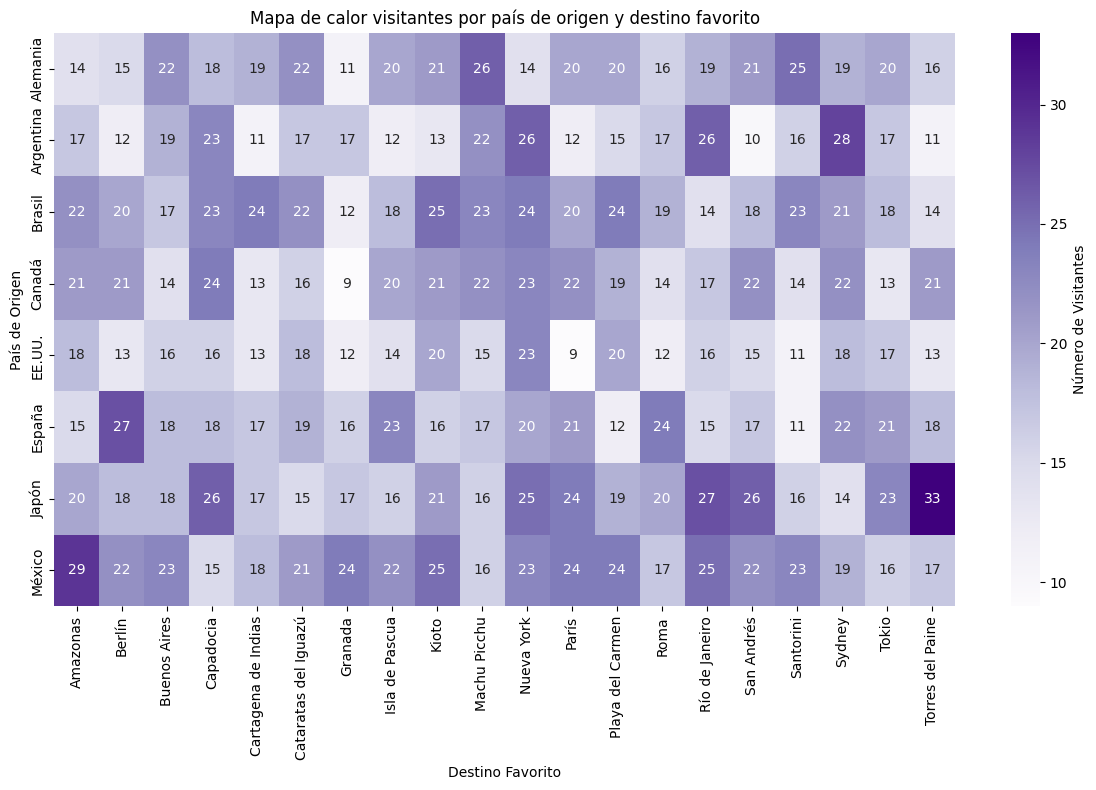

In [23]:
# Calcular el número de visitantes por país de origen y destino favorito
visit_x_dest = turismo_df.groupby(['pais_origen', 'nombre_x']).size().unstack(fill_value=0)

# Crear mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(visit_x_dest, annot=True, fmt='d', cmap='Purples', cbar_kws={'label': 'Número de Visitantes'}) #cmap purples es para el color morado
plt.title('Mapa de calor visitantes por país de origen y destino favorito')
plt.xlabel('Destino Favorito')
plt.ylabel('País de Origen')
plt.tight_layout()
plt.show()


# Preguntas de análisis:

**¿Los destinos más caros tienen mejores calificaciones?**

In [30]:
# Costo promedio
cost_calxdest = turismo_df.groupby('nombre_x').agg({
    'costo_promedio_usd': 'mean',
    'calificacion': 'mean'
}).reset_index()

# Ordenar
cost_calxdest_ordenado = cost_calxdest.sort_values(by='costo_promedio_usd', ascending=False)

print("Destinos ordenados por costo promedio y su calificación promedio:")
display(cost_calxdest_ordenado)


Destinos ordenados por costo promedio y su calificación promedio:


,nombre_x,costo_promedio_usd,calificacion
16,Santorini,971.41,3.100719
9,Machu Picchu,953.18,3.038217
0,Amazonas,872.87,3.038462
11,París,840.82,2.690789
19,Torres del Paine,745.39,2.965035
14,Río de Janeiro,722.67,2.974843
2,Buenos Aires,621.06,3.006803
5,Cataratas del Iguazú,618.73,2.700000
17,Sydney,548.52,2.883436
1,Berlín,460.35,3.020270


**¿Qué tipo de destino tiene la mayor duración promedio de visita?**

In [32]:
# Calc duración promedio por tipo de destino
duracion_promedio_por_tipo = turismo_df.groupby('tipo')['duracion_dias'].mean().sort_values(ascending=False)

# Tipo de destino con la mayor duración promedio
tipo_mayor_duracion = duracion_promedio_por_tipo.index[0]
mayor_duracion = duracion_promedio_por_tipo.iloc[0]

print(f"\nEl tipo de destino con la mayor duración promedio de visita es: '{tipo_mayor_duracion}' con una duración promedio de {mayor_duracion:.2f} días.")


El tipo de destino con la mayor duración promedio de visita es: 'Aventura' con una duración promedio de 16.72 días.


**¿Qué tipo de destino (playa/ciudad) tiene mejores reseñas?**

In [26]:
calificacion_promedio_por_tipo = turismo_df.groupby('tipo')['calificacion'].mean().sort_values(ascending=False)

#print("Calificación promedio por tipo de destino:")
#print(calificacion_promedio_por_tipo)

mejor_tipo_reseña = calificacion_promedio_por_tipo.index[0]
print(f"El tipo de destino con mejores reseñas es: {mejor_tipo_reseña}")


El tipo de destino con mejores reseñas es: Playa


**¿Cuál es el país de origen más común?**

In [24]:
pais_origen_mas_comun = turismo_df['pais_origen'].mode()[0]
print(f"El país de origen más común es: {pais_origen_mas_comun}")

El país de origen más común es: México
